In [4]:
# 03_logistic_regression.ipynb

import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

artifacts = joblib.load("../Dataset/preprocessed_artifacts.pkl")

X_train = artifacts["X_train"]
X_test = artifacts["X_test"]
y_train = artifacts["y_train"]
y_test = artifacts["y_test"]
preprocessor = artifacts["preprocessor"]

# ---- Build pipeline ----
log_reg = LogisticRegression(max_iter=1000)

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", log_reg),
    ]
)

# ---- Train ----
clf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Classification report:

              precision    recall  f1-score   support

        Good       0.77      0.74      0.76      3566
        Poor       0.79      0.81      0.80      5799
    Standard       0.81      0.81      0.81     10635

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



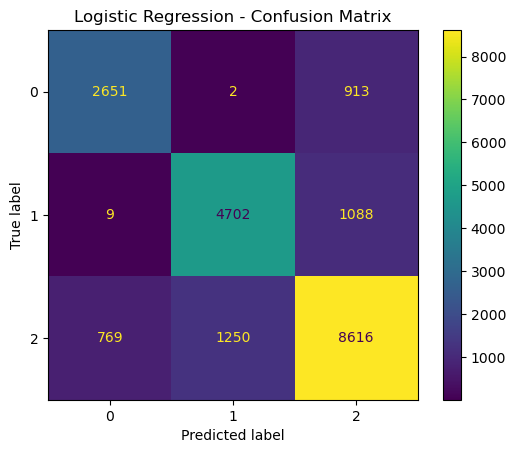

In [5]:
# ---- Evaluation ----
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] if len(set(y_test)) == 2 else None

print("Classification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

if y_proba is not None:
    roc_auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC:", roc_auc)
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title("Logistic Regression - ROC curve")
    plt.show()


Classification report:

              precision    recall  f1-score   support

        Good       0.77      0.74      0.76      3566
        Poor       0.79      0.81      0.80      5799
    Standard       0.81      0.81      0.81     10635

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



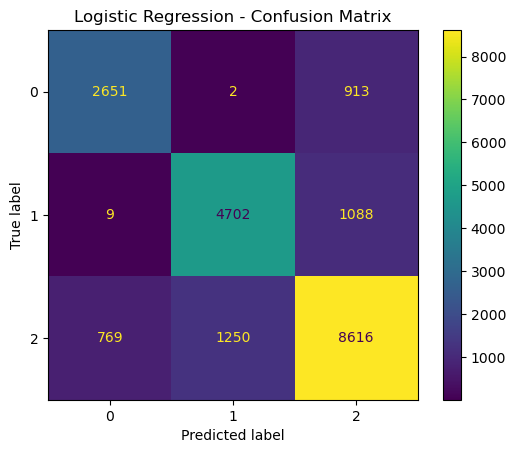

In [6]:
# ---- Evaluation ----
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] if len(set(y_test)) == 2 else None

print("Classification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

if y_proba is not None:
    roc_auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC:", roc_auc)
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title("Logistic Regression - ROC curve")
    plt.show()
